In [1]:
import numpy as np # linear algebra
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

from src.data.make_dataset import *
from src.models.train_model import *
from src.models.predict_model import *
from src.visualization.visualize import *

2022-07-13 21:15:18.940527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 21:15:18.940604: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Reload the module after modifying it
# import importlib
# importlib.reload(src)

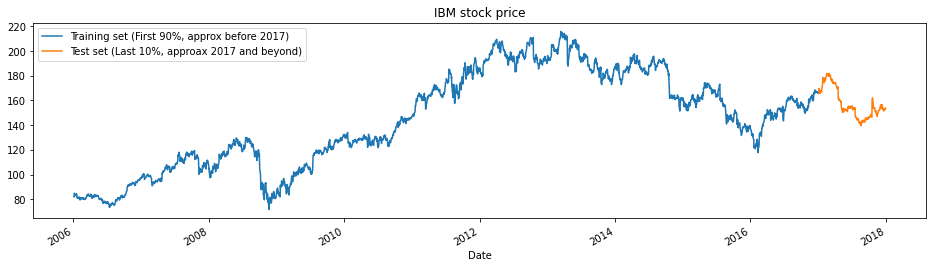

In [3]:
dataset = pd.read_csv('data/external/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()
dataset["Close"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["Close"]['2017':].plot(figsize=(16,4),legend=True) # 10% is used for thraining data which is approx 2017 data
plt.legend(['Training set (First 90%, approx before 2017)','Test set (Last 10%, approax 2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [4]:
dataset = dataset[:-100]
Enrol_window = 10
feature_train, label_train, feature_test, label_test = load_data(dataset, 'Close', Enrol_window, True)

In [8]:
model = create_model(feature_train.shape)
filepath = './models/epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]
model.fit(feature_train, label_train, batch_size=10, epochs=10, callbacks=callbacks, validation_data = (feature_test, label_test))

model compiled
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
260/262 [==========

10/10 [==============================] - 2s 14ms/step


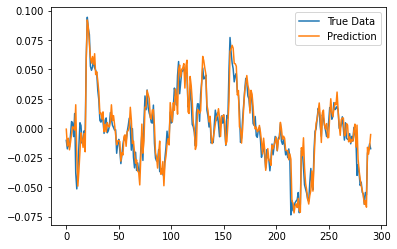

In [9]:
predicted_stock_price = model.predict(feature_test)
plot_results(predicted_stock_price,label_test)